              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  
(13320, 9)

 Data Cleaning

 View All Columns
Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

 Drop Unnecessary Columns

 Check for Missing Values
loca

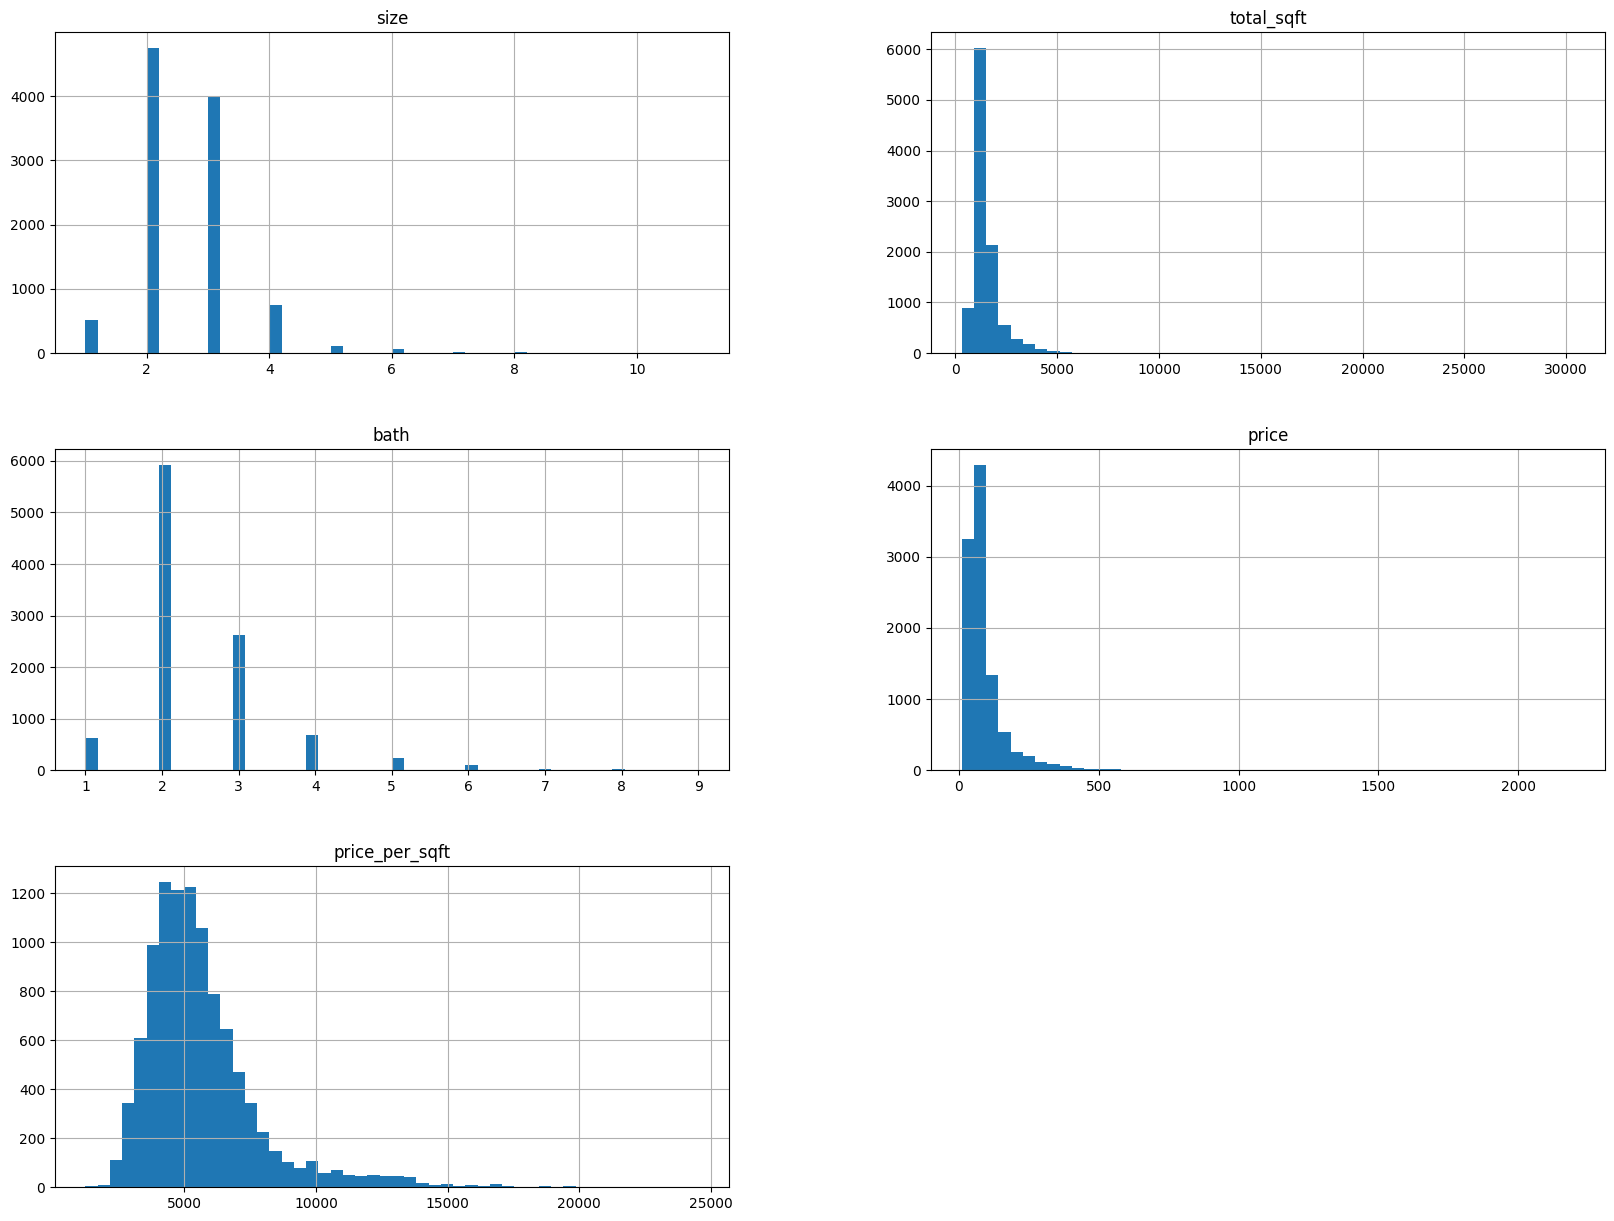


 Statistical Description
           location          size    total_sqft          bath         price  \
count  10241.000000  10241.000000  10241.000000  10241.000000  10241.000000   
mean     155.875012      2.568109   1501.169193      2.469485     90.886476   
std       77.655957      0.871351    864.259711      0.953751     85.913990   
min        0.000000      1.000000    300.000000      1.000000     10.000000   
25%       93.000000      2.000000   1108.000000      2.000000     49.000000   
50%      169.000000      2.000000   1282.000000      2.000000     67.000000   
75%      236.000000      3.000000   1650.000000      3.000000    100.000000   
max      240.000000     11.000000  30400.000000      9.000000   2200.000000   

       price_per_sqft  
count    10241.000000  
mean      5659.133843  
std       2267.163920  
min       1250.000000  
25%       4242.424242  
50%       5175.438596  
75%       6428.571429  
max      24509.803922  
      Predicted House Price =    Actual = 
274

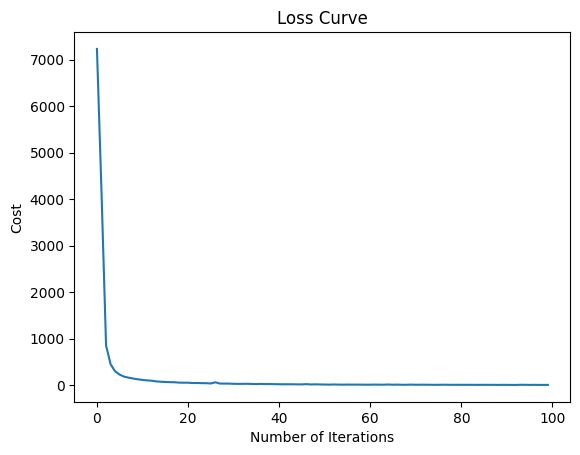

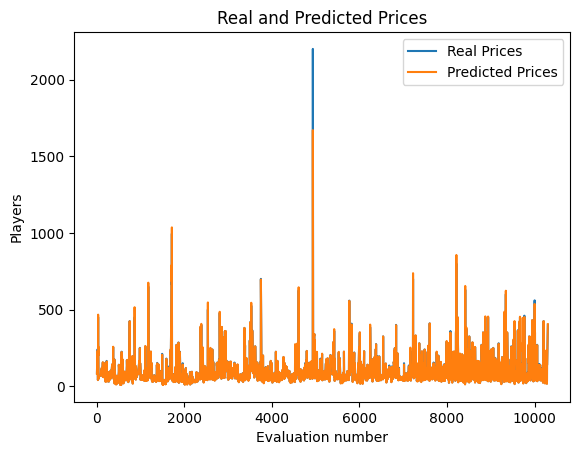

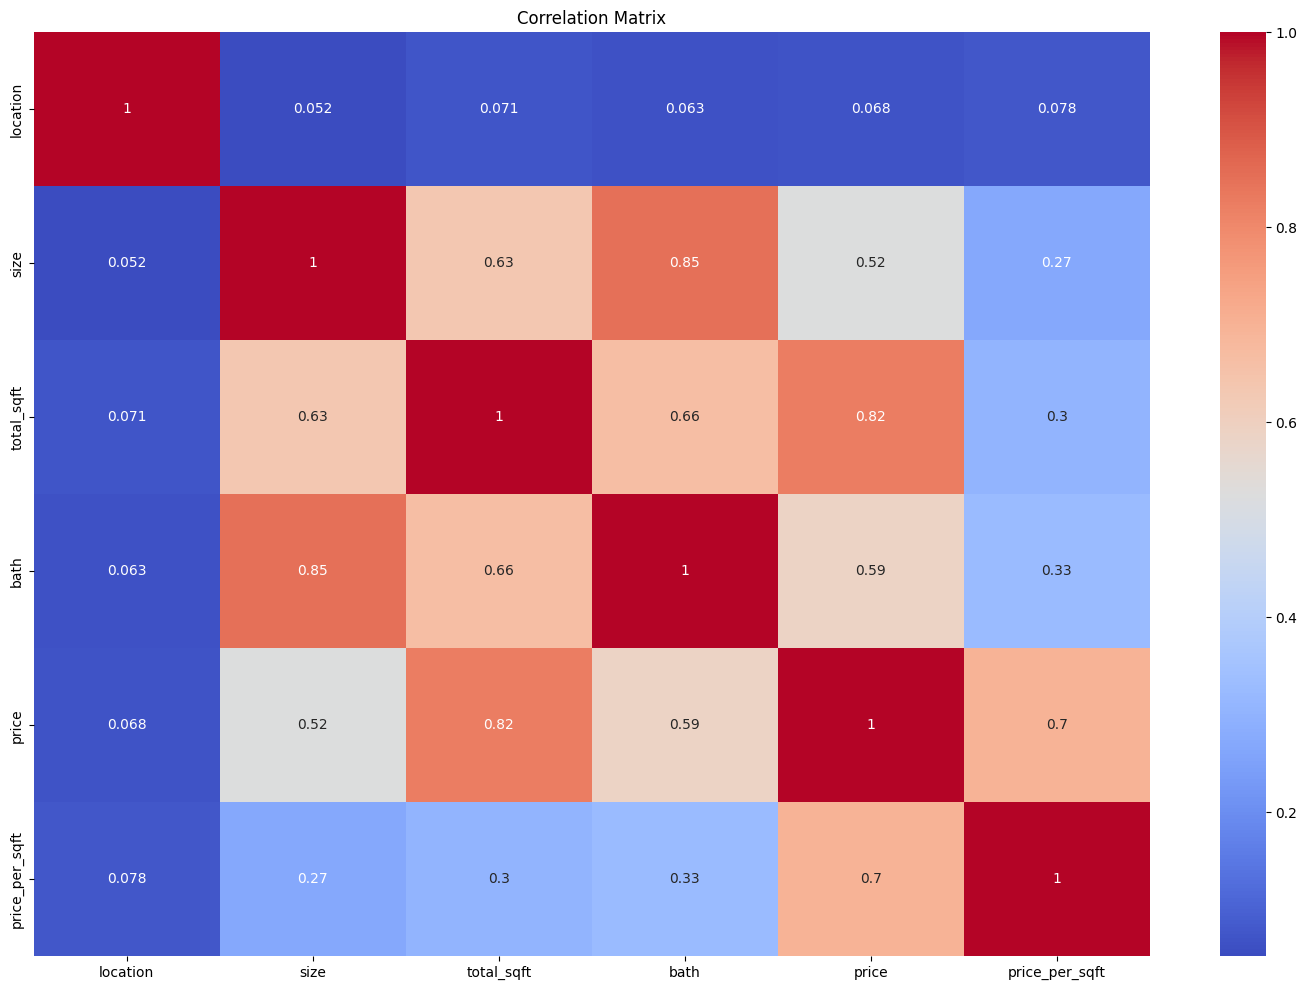


 New Description
Location:  2nd Stage Nagarbhavi
Rooms:  4.0
Bathrooms:  3.0
Total Sqft:  1500.0
Predicted Price:  221.68493191312282


array([221.68493191])

In [35]:
"""
Created on Apr 7, 2024

@author: Gideon Assafuah

Neural Network Regressor for predicting real estate prices
Implemented as Deep Learning
"""

#Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Instantiate the label encoder
label_encoder = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')


def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  
    
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    print("\n Test:", df.groupby('location'))
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


class NN_Regression:
    
    def load_Data(self, filepath): 
        df = pd.read_csv(filepath)
        
        self.df = df
        
        print(df.head())
        
        print(df.shape)

    def clean_data(self):
        print('\n Data Cleaning')
        df = self.df

        print('\n View All Columns')
        print(df.columns)

        print('\n Drop Unnecessary Columns')
        df = df.drop(['area_type','society','balcony','availability'],axis='columns')

        print('\n Check for Missing Values')
        print(df.isnull().sum())
        print(df.shape)

        # convert size to string and remove the text
        df['size'] = df['size'].astype(str)
        df['size'] = df['size'].apply(lambda x: x.split(' ')[0])


        # Explore total_sqft feature
        print(df[~df['total_sqft'].apply(is_float)].head(10))

        df.total_sqft = df.total_sqft.apply(convert_sqft_to_num)
        df = df[df.total_sqft.notnull()]

        # check new total_sqft values
        print("Check new total_sqft values")    
        print(df.head(2))
        
        # Add price per unit
        df['price_per_sqft'] = df['price']*100000/df['total_sqft']

        df['location'] = df['location'].astype(str)
        df['location'] = df['location'].apply(lambda x: x.strip())
        location_stats = df['location'].value_counts(ascending=False)
        print(location_stats)

        print(location_stats.values.sum())

        print(len(location_stats[location_stats>10]))

        print(len(location_stats))

        print(len(location_stats[location_stats<=10]))

        location_stats_less_than_10 = location_stats[location_stats<=10]

        print(location_stats_less_than_10)

        print(len(df.location.unique()))

        df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

        print(len(df.location.unique()))

        print("\n Table with location")
        print(df.head(10))

        # Removing outliers
        
        # convert size and total_sqft to float
        df['size'] = df['size'].astype(float)
        df['total_sqft'] = df['total_sqft'].astype(float)

        # square feet per bedroom has to be greater than 300
        print(df[df['total_sqft']/df['size'] < 300].head())
        df = df[~(df['total_sqft']/df['size'] < 300)]

        print(df.shape)

        # remove outliers using standard deviation and mean

        print(df.price_per_sqft.describe())

        df = remove_pps_outliers(df)
        print(df.shape)

        print('\n Table With Price Per Sqft')
        print(df.head(40))

        # remove outliers using bath feature
        df = df[df['bath'] < 10]

        print(df['bath'].unique())

        # print all missing values
        print(df.isnull().sum())

        self.df = df

    def visualize_data(self):
        df = self.df
        # histograms of features
        df.hist(bins=50, figsize=(20, 15),)
        plt.show()

        """ # scattar plts
        plt.figure(figsize=(18, 12))

        plt.subplot(2, 2, 1)
        plt.scatter(df['room'], df['price'])
        plt.title('Room vs Price')
        plt.xlabel('Room')
        plt.ylabel('Price')

        plt.subplot(2, 2, 2)
        plt.scatter(df['bath'], df['price'])
        plt.title('Bath vs Price')
        plt.xlabel('Bath')
        plt.ylabel('Price')

        plt.subplot(2, 2, 3)
        plt.scatter(df['acre_lot'], df['price'])
        plt.title('Acre Lot vs Price')
        plt.xlabel('Acres Lot')
        plt.ylabel('Price')
        

        plt.subplot(2, 2, 4)
        plt.scatter(df['house_size'], df['price'])
        plt.title('House size vs Price')
        plt.xlabel('House Size')
        plt.ylabel('Price')

        plt.show()

        # correlation matrix
        plt.figure(figsize=(18, 12))
        corr = df.corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm')
        plt.title('Correlation Matrix')
        plt.show()

        # reggression plot
        plt.figure(figsize=(18, 12))

        plt.subplot(2, 2, 1)
        sns.regplot(x='room', y='price', data=df)
        plt.title('Room vs Price')

        plt.subplot(2, 2, 2)
        sns.regplot(x='bath', y='price', data=df)
        plt.title('Bath vs Price')

        plt.subplot(2, 2, 3)
        sns.regplot(x='acre_lot', y='price', data=df)
        plt.title('Acre Lot vs Price')

        plt.subplot(2, 2, 4)
        sns.regplot(x='house_size', y='price', data=df)
        plt.title('House Size vs Price')

        plt.show() """
        
        
    def data_preprocessing(self):
        df = self.df 
        df['location'] = label_encoder.fit_transform(df['location'])
        features = df[['size', 'total_sqft', 'bath', 'price_per_sqft']]
        label = df['price']
        print('\n Statistical Description')
        print(df.describe())
        X_train, X_test, y_train, y_test = train_test_split(
            features, label, test_size=0.25, random_state=0
        )
        scaleD = StandardScaler()
        scaled_X_train = scaleD.fit_transform(X_train)
        scaled_X_test = scaleD.transform(X_test)           
        self.X_train = X_train 
        self.scaled_X_train = scaled_X_train
        self.X_test = X_test
        self.scaled_X_test = scaled_X_test
        self.y_train = y_train
        self.y_test = y_test  
        self.scaleD = scaleD
        
        
    def NN_Deep_Learning(self):            
        scaled_X_train = self.scaled_X_train
        scaled_X_test = self.scaled_X_test
        y_train = self.y_train
        NNregres = MLPRegressor(
            hidden_layer_sizes = (100, 90, 80),
            activation = "relu",
            solver='adam',
            max_iter = 100,
            random_state = 42
        )       
        NNregres.fit(scaled_X_train, y_train)                  
        pred_y = NNregres.predict(scaled_X_test) 
        
        self.NNregres = NNregres
        self.pred_y = pred_y
               
    def evaluate_NNregress(self):   
        print(pd.DataFrame({'Predicted House Price = ':self.pred_y, ' Actual = ':self.y_test}))
        mean_absolute_error = metrics.mean_absolute_error(self.y_test, self.pred_y)
        print('\n Mean Absolute Error = ', mean_absolute_error)
        print('Mean Squared Error = ', metrics.mean_squared_error(self.y_test, self.pred_y))
        print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(self.y_test, self.pred_y)))   
        print("Correlation Score: ", (r2_score(self.pred_y, self.y_test)))

        average_price = self.df['price'].mean()
        print('Average Price: ', average_price)

        # Calculate Accuracy
        percentage_error = ( mean_absolute_error / average_price ) * 100
        print('Percentage Error = ', percentage_error, '%')
        print('Accuracy = ', 100 - percentage_error, '%')
        
        #Visualize the error graph
        plt.plot(self.NNregres.loss_curve_)
        plt.title("Loss Curve", fontsize=12)
        plt.xlabel('Number of Iterations')
        plt.ylabel('Cost')
        plt.show()
        
        #Visualize Actual and Predicted values              
        main_pred = pd.DataFrame({'Real Prices': self.y_test, 'Predicted Prices': self.pred_y}) 
        main_pred.sort_index().plot()  
        plt.title("Real and Predicted Prices")
        plt.xlabel('Evaluation number')
        plt.ylabel('Players')               
        plt.show()       

        # correlation matrix
        plt.figure(figsize=(18, 12))
        corr = self.df.corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm')
        plt.title('Correlation Matrix')
        plt.show()
        
    def predict_new_instance(self, new_instance):          
         # Prepare the new instance
        new_instance = self.scaleD.transform(new_instance)
        # Predict the new instance
        new_pred = self.NNregres.predict(new_instance)
        print('Predicted Price: ', new_pred[0])
        return new_pred
                
        
        
        

#--------------------------class driver--------------------------------------------------------
handle = NN_Regression()
filepath = 'bengaluru_house_prices.csv'

handle.load_Data(filepath)

handle.clean_data()

handle.visualize_data()

handle.data_preprocessing()

handle.NN_Deep_Learning()

handle.evaluate_NNregress()

# Deployment
# define decoded inputs
location = input("Enter location: ")
rooms = float(input("Enter number of rooms: "))
bath = float(input("Enter number of bathrooms: "))
total_sqft = float(input("Enter acre lot: "))
price_per_sqft = float(input("Enter price per sqft: "))

# New  description  
print ('\n New Description')
print('Location: ', location)
print('Rooms: ', rooms)
print('Bathrooms: ', bath)
print('Total Sqft: ', total_sqft)

#Prepare 2D List data structure    
prediction_inputs = []

location = label_encoder.transform([location])[0]


prediction_inputs.append([rooms, total_sqft, bath, price_per_sqft])  
handle.predict_new_instance(prediction_inputs)  
